In [5]:
#import pandas for dataframes, import seaborn for graphs, import csv, import os for file handling
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import webbrowser
import math

global df
df = pd.read_csv('outputs.csv') #import csv

list_outliers = {} #global list of outliers for later use


# def main():
    
#     df_gen()
#     graph_gen()
#     create_website()
    
# main()


In [6]:
# def df_gen():

#drop unneeded columns
for col in df.columns:
    if (('GlobalEfficiency' in col) or ('MaximizedModularity' in col) 
        or ('MeanClusteringCoeff' in col) or ('MeanTotalStrength'in col)
        or ('NetworkCharacteristic' in col) or ('TotalStrength' in col)
        or ('dummyrest' in col) or ('session_id' in col) or ('subject_id' in col)
        or ('dummy_rest' in col) or ('file_name' in col) or ('1back' in col)
        or ('acq_id' in col)):
        del df[col]
        
#filter id columns to include only integers
for id in df['id0'].dropna():
    idnum=id[-3:]
    df['id0']=df['id0'].replace(id,idnum) 

df['id0.1']=df['id0']  
df['id0.2']=df['id0'] 
df['id0.3']=df['id0']
df['id0.4']=df['id0']
df['id0.5']=df['id0']
df['id0.6']=df['id0']
df['id0.7']=df['id0']



Graph not generated for: datetime
Graph not generated for: id0.3
Graph not generated for: id0.4
Graph not generated for: id0.5
Graph not generated for: id0.6
Graph not generated for: id0.7
Graph not generated for: run_id


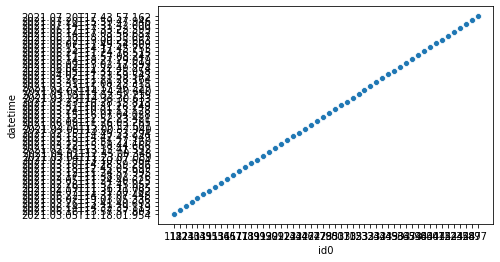

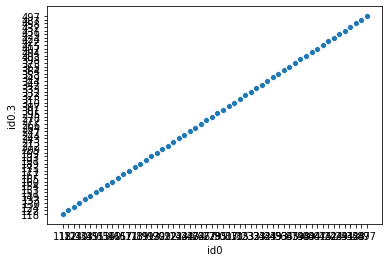

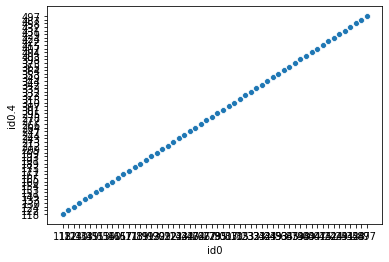

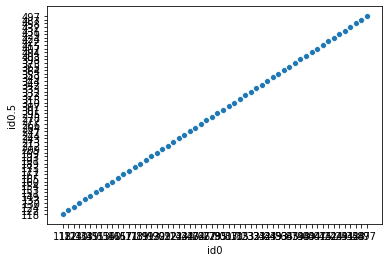

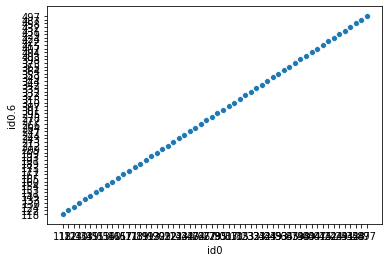

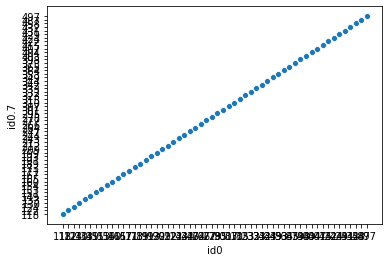

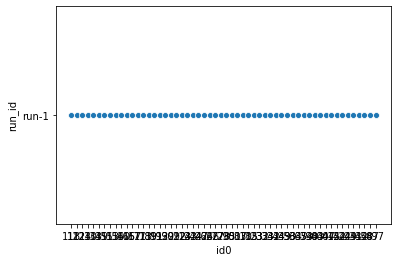

In [3]:
# def graph_gen():
#     global df
# for filename in os.listdir(directory):
#     if filename.endswith(".png"):
#         os.delete(filename)

#create graphs
for i,col in enumerate(df.columns.drop(['id0','id0.1','id0.2'])):
    try:
        plt.figure(i) #blank plot, to load graphs
        ax = sns.scatterplot(x='id0',y=col, data=df)
        std_line = df[col].std()
        ax = sns.lineplot(x='id0',y=std_line+df[col].mean(), data=df)
        ax = sns.lineplot(x='id0',y=-1*std_line+df[col].mean(), data=df)
        ax = sns.lineplot(x='id0',y=2*std_line+df[col].mean(), data=df)
        ax = sns.lineplot(x='id0',y=-2*std_line+df[col].mean(), data=df)
        ax.set_xticklabels(df['id0'],rotation=270)
        fig = ax.get_figure() 
        fig.savefig(col+'.png') #save each plot in local folder
        plt.close(fig)
        
    except TypeError:
        print('Graph not generated for: '+col) 

In [7]:
#create descriptions for different variables using keywords, return corresponding string
def desc(name):
    if('snrd' in name):
        return 'Dietrich’s SNR using air background as reference:<span style="color: green"> &#8593</span>'
    elif('snr' in name or 'tsnr' in name):
        return 'Signal-to-Noise ratio:<span style="color: green"> &#8593</span>'
    elif('cnr' in name):
        return 'Contrast-to-noise ratio:<span style="color: green"> &#8593</span>'
    elif('fwhm' in name):
        return 'Full-width half maximum estimations:<span style="color: green"> &#8595</span>'
    elif('qi2' in name):
        return 'Goodness of fit of a noise model into the background noise: <span style="color: green">&#8595</span>'
    elif('cjv' in name):
        return 'Coefficient of joint variation:<span style="color: green"> &#8595</span>'
    elif(name.startswith('efc')):
        return """Entropy focus criterion:
        <span style="color: green"> &#8595 more uniform distribution, less noisy</span>"""
    elif('fber' in name):
        return 'Foreground-background energy ratio:<span style="color: green"> &#8593</span>'
    elif('qi1' in name):
        return 'Segmentation using mathematical morphology:<span style="color: green"> &#8595</span>'
    elif('inu' in name):
        return 'Intensity non-uniformity estimate measurements:<span style="color: green"> ~1</span>'
    elif('pve' in name):
        return 'Partial volume errors:<span style="color: green"> &#8595</span>'
    elif('wm2max' in name):
        return 'White-matter to maximum intensity ratio:<span style="color: green"> [0.6, 0.8]</span>'
    elif('icv' in name):
        return 'Intracranial volume fractions: <span style="color: green"> “should move within a normative range”</span>'
    elif('rpve' in name):
        return 'Residual partial volume errors:<span style="color: green"> &#8595</span>'
    elif('fd' in name):
        return 'Framewise displacement:<span style="color: green"> &#8595</span>'
    elif('dvars' in name):
        return 'Temporal derivative of timecourses RMS variance over voxels:<span style="color: green"> &#8595</span>'
    elif('gsr' in name):
        return 'Ghost-to-signal Ratio:<span style="color: green"> &#8595</span>'
    elif('gcor' in name):
        return 'Global correlation :<span style="color: green"> &#8595</span>'
    elif('spikes' in name):
        return 'High frequency and global intensity :<span style="color: green"> &#8595 (lessvolumes to remove if filtering)</span>'
    elif('aor' in name):
        return 'AFNI’s outlier ratio: mean fraction of outliers per fMRI volume'
    elif('aqi' in name):
        return 'AFNI’s quality index: mean quality index'
    elif('coregCrossCorr' in name):
        return 'Cross correlation:<span style="color: green"> &#8593</span>'
    elif('CoregJaccard' in name):
        return 'Jaccard index:<span style="color: green"> &#8593</span>'
    elif('CoregDice' in name):
        return 'Dice index:<span style="color: green"> &#8593</span>'
    elif('CoregCoverage' in name):
        return 'Coverage index:<span style="color: green"> &#8593</span>'
    elif('regCrossCorr' in name):
        return 'Cross correlation:<span style="color: green"> &#8593</span>'
    elif('regJaccard' in name):
        return 'Jaccard index:<span style="color: green"> &#8593</span>'
    elif('regDice' in name):
        return 'Dice index:<span style="color: green"> &#8593</span>'
    elif('regCoverage' in name):
        return 'Coverage index:<span style="color: green"> &#8593</span>'
    elif('normCrossCorr' in name):
        return 'Cross correlation:<span style="color: green"> &#8593</span>'
    elif('normJaccard' in name):
        return 'Jaccard index:<span style="color: green"> &#8593</span>'
    elif('normDice' in name):
        return 'Dice index:<span style="color: green"> &#8593</span>'
    elif('normCoverage' in name):
        return 'Coverage index:<span style="color: green"> &#8593</span>'
    elif('relMeanRMSMotion' in name):
        return 'Mean value of RMS motion:<span style="color: green"> &#8595</span>'
    elif('relMaxRMSMotion' in name):
        return 'Maximum value of RMS motion:<span style="color: green"> &#8595</span>'
    elif('nSpikesFD' in name):
        return 'Number of spikes per FD:<span style="color: green"> &#8595</span>'
    elif('nspikesDV' in name):
        return 'Number of spikes per DV:<span style="color: green"> &#8595</span>'
    elif('pctSpikesDV' in name):
        return 'Percentage of spikes per DV:<span style="color: green"> &#8595</span>'
    elif('pctSpikesFD' in name):
        return 'Percentage of spikes per DV:<span style="color: green"> &#8595/span>'
    elif('meanDV' in name):
        return 'Mean DVARS:<span style="color: green"> &#8595</span>'
    elif('motionDVCorrInit' in name):
        return 'Correlation of RMS and DVARS before regression:<span style="color: green"> &#8595</span>'
    elif('motionDVCorrFinal' in name):
        return 'Correlation of RMS and DVARS after regression :<span style="color: green"> &#8595 lower than init</span>'
    elif('nNuisanceParameters' in name):
        return 'Total number of nuisance Parameters in addition to custom regressors:<span style="color: green"> &#8595</span> (confound regression model-dependent)'
    elif('nVolCensored' in name):
        return 'Total number of volume(s) censored:<span style="color: green"> &#8595</span>'
    elif('estimatedLostTemporalDOF' in name):
        return 'Total degree of freedom lost:<span style="color: green"> &#8595</span>'
    elif('mean_fd' in name):
        return 'Mean framewise displacement:<span style="color: green"> &#8595</span>'
    elif('max_fd' in name):
        return 'Maximum framewise displacement:<span style="color: green"> &#8595</span>'
    elif('max_translation' in name):
        return '<span style="color: green"> &#8595</span>'
    elif('max_rotation' in name):
        return '<span style="color: green"> &#8595</span>'
    elif('max_rel_translation' in name):
        return 'Maxima of derivative of max_translation:<span style="color: green"> &#8595</span>'
    elif('max_rel_rotation' in name):
        return 'Maxima of derivative of max_rotation:<span style="color: green"> &#8595</span>'
    elif('t1_dice_distance' in name):
        return '<span style="color: green"> &#8593</span>'
    elif('mni_dice_distance' in name):
        return '<span style="color: green"> &#8593</span>'
    elif('raw_incoherence_index ' in name):
        return '<span style="color: green"> &#8595</span>'
    elif('raw_coherence_index ' in name):
        return '<span style="color: green"> &#8593</span>'
    elif('t1_incoherence_index ' in name):
        return '<span style="color: green"> &#8595</span>'
    elif('t1_coherence_index ' in name):
        return '<span style="color: green"> &#8593</span>'
    elif('num_bad_slices' in name):
        return '<span style="color: green"> &#8595</span>'
    elif('raw_dimension' in name):
        return 'Should match protocol field of view'
    elif('raw_voxel_size' in name):
        return 'Should match protocol resolution'
    elif('raw_max_b' in name):
        return 'Should match protocol maximum b'
    elif('raw_neighbor_corr' in name):
        return 'Neighboring DWI Correlation (NDC)'
    elif('raw_num_directions' in name):
        return 'Should match protocol number of directions for dwi scan'
    elif('t1_dimension' in name):
        return 'Preprocessed space field of view'
    elif('t1_voxel_size' in name):
        return 'Preprocessed space resolution controlled by --output_resolution value'
    if('t1_max_b' in name):
        return 'Equal to raw_max_b'
    elif('t1_neighbor_corr' in name):
        return 'Equal to raw_neighbor_corr'
    elif('t1_num_directions' in name):
        return 'Equal to raw_num_directions'
    else:
        return ""
    
    

In [8]:
def mean(name):
    return str(df[name].mean())

In [9]:
def median(name):
    return str(df[name].median())

In [10]:
def std(name):
    return str(df[name].std())

In [11]:
def rnge(name):
    return str(df[name].max() - df[name].min())

In [12]:
def outliers(name):
    flag = False
    outs = ""
    mean_ = float(mean(name))
    std_ = float(std(name))
    for i in df.index:
        if((mean_-2*std_)>df[name][i] or df[name][i]>(mean_+2*std_)):
            if(flag):
                outs += ", "+ str(df['id0'][i])
                if df['id0'][i] in list_outliers:
                    list_outliers[df['id0'][i]].append(name)
                else:
                    list_outliers[df['id0'][i]] = [name]    
            else:
                outs += str(df['id0'][i])
                flag = True
                if df['id0'][i] in list_outliers:
                    list_outliers[df['id0'][i]].append(name)
                else:
                    list_outliers[df['id0'][i]] = [name] 
                
    return outs

In [13]:
# def create_website():
#     global df
list_outliers.clear()
f = open('QCGraphs.html','w') #create QCGraphs in local folder

grphs = ""
counter = 0
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".png") and filename != "Illini_icon.png":

        #descriptive stats
        name = filename[:len(filename) - 4]
#         mean = str(df[name].mean())
#         median = str(df[name].median())
#         std = str(df[name].std())
#         rnge = str(df[name].max() - df[name].min())
        
        stats = """<table style="width:50% ">
                  <tr>
                    <th colspan="2">"""+name+"""</th>
                  </tr>
                  <tr>
                    <td>Mean</td>
                    <td>"""+mean(name)+"""</td>
                  </tr>
                   <tr>
                    <td>Median</td>
                    <td>"""+median(name)+"""</td>
                  </tr>
                   <tr>
                    <td>Std.</td>
                    <td>"""+std(name)+"""</td>
                  </tr>
                   <tr>
                    <td>Range</td>
                    <td>"""+rnge(name)+"""</td>
                  </tr>
                </table>"""
        
        #create div to align graphs
        if counter%3==0:
            grphs += "<div class=row>"

        grphs+= ("<div class=column><h2 style='text-align:center'>"+name+"</h2><div class='image1'><img src="+ filename+
            " >\n</div><br><p font-style=italic align=center><i>"+stats+ 
            "<br><font size='+2'>" +str(desc(name))+
            "</font><br>Outliers: "+outliers(name)+"</i></p></div>")
        
        if counter % 3==2:
            grphs += "</div>"

        counter+=1
    else:
        continue

code = """<html>
<style>
    body{
        margin:0;
    }
    .row {
        display: flex;
    }
    .column {
        flex: 50%;
        padding: 5px;
    }
    table, th, td {
      border: 1px solid black;
      border-collapse: collapse;
    }
    
    ul {
        list-style-type: none;
        margin: 0;
        padding: 0;
        overflow: hidden;
        background-color: #13294b;
    }

    li {
        float: left;
    }
    li a {
        display: block;
        color: white;
        text-align: center;
        padding: 14px 16px;
        text-decoration: none;
    }
    li a.active {
        background-color: #E84A27;
        color: white;
    }
    li a:hover {
        background-color: #E8E9EA;
    }
    .image1 {
        display: flex;
        justify-content: center;
    }
    
    
    #searchbar{
     padding:13px;
     border-radius: 10px;
   }
 
   input[type=text] {
      width: 7%;
      -webkit-transition: width 0.15s ease-in-out;
      transition: width 0.15s ease-in-out;
   }
   input[type=text]:focus {
     width: 15%;
   }
   
</style>

<head>
    <ul>
        <li><a class="active" href=QCGraphs.html>QCGraphs</a></li>
        <li><a href=outliers.html>Outliers</a></li>
        <li><a href=About.html>About</a></li>
        <li style="float:right; padding: 5px;"><img src="Illini_icon.png" width = 3.5% style="float:right"></li>
        <input id="searchbar" onkeyup="Search_var()" type="text" name="search" placeholder="Search...">
    </ul>
    
     
     
</head>
"""
f.write(code)

#insert graphs
code2 = """

<body style="background-color:#f0f0f0">

<div style = "text-align: center; vertical-align: middle;">
<h1>Last Updated: 07/27/2021</h1>
</div>

"""+grphs+"""</body> 

<script>
function Search_var() {
    let input = document.getElementById('searchbar').value
    input=input.toLowerCase();
    let x = document.getElementsByClassName('column');
     
    for (i = 0; i < x.length; i++) {
        if (!x[i].innerHTML.toLowerCase().includes(input)) {
            x[i].style.display="none";
        }
        else {
            x[i].style.display="";                
        }
    }
}
</script>
</html>"""


f.write(code2)
f.close()

#open html file
QCfile = 'file:///'+os.getcwd()+'/' + 'QCGraphs.html'
webbrowser.open_new_tab(QCfile)

KeyError: 'aor_rest_Age'

In [30]:
def get_outliers():
    output = ""
    for key in list_outliers:
        output += "<div class = outliers><br><h2>"+str(key) + "</h2><h3> (" +str(len(list_outliers.get(key)))+" occurences):</h3><br>"
        flag = False
        for item in list_outliers.get(key):
            if flag:
                output += ", "+ str(item)
            else:
                output += str(item)
                flag = True
        output += "</div>"
    return output




<style>

</style>

<div id="fig_el1218019339542349124377030768"></div>
<script>
function mpld3_load_lib(url, callback){
  var s = document.createElement('script');
  s.src = url;
  s.async = true;
  s.onreadystatechange = s.onload = callback;
  s.onerror = function(){console.warn("failed to load library " + url);};
  document.getElementsByTagName("head")[0].appendChild(s);
}

if(typeof(mpld3) !== "undefined" && mpld3._mpld3IsLoaded){
   // already loaded: just create the figure
   !function(mpld3){
       
       mpld3.draw_figure("fig_el1218019339542349124377030768", {"width": 432.0, "height": 288.0, "axes": [], "data": {}, "id": "el121801933954234912", "plugins": [{"type": "reset"}, {"type": "zoom", "button": true, "enabled": false}, {"type": "boxzoom", "button": true, "enabled": false}]});
   }(mpld3);
}else if(typeof define === "function" && define.amd){
   // require.js is available: use it to load d3/mpld3
   require.config({paths: {d3: "https://d3js.org/d3.v5"}});
   require([

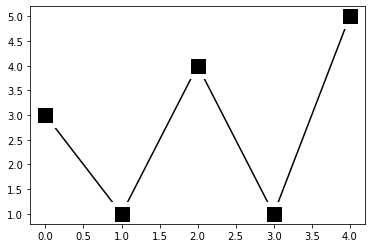

<Figure size 432x288 with 0 Axes>

In [41]:
f2 = open('outliers.html','w') #create outliers in local folder

code = """<html>
<style>
    body{
        margin:0;
    }
    .row {
        display: flex;
    }
    .column {
        flex: 50%;
        padding: 5px;
    }
    table, th, td {
      border: 1px solid black;
      border-collapse: collapse;
    }
    
    ul {
        list-style-type: none;
        margin: 0;
        padding: 0;
        overflow: hidden;
        background-color: #13294b;
    }

    li {
        float: left;
    }
    li a {
        display: block;
        color: white;
        text-align: center;
        padding: 14px 16px;
        text-decoration: none;
    }
    li a.active {
        background-color: #E84A27;
        color: white;
    }
    li a:hover {
        background-color: #E8E9EA;
    }
    .image1 {
        display: flex;
        justify-content: center;
    }
    
    
    #searchbar{
     padding:13px;
     border-radius: 10px;
   }
 
   input[type=text] {
      width: 7%;
      -webkit-transition: width 0.15s ease-in-out;
      transition: width 0.15s ease-in-out;
   }
   input[type=text]:focus {
     width: 15%;
   }
   h2{display:inline;}
   h3{display:inline;}
   
</style>

<head>
    <ul>
        <li><a href=QCGraphs.html>QCGraphs</a></li>
        <li><a class="active" href=outliers.html>Outliers</a></li>
        <li><a href=About.html>About</a></li>
        <li style="float:right; padding: 5px;"><img src="Illini_icon.png" width = 3.5% style="float:right"></li>
        <input id="searchbar" onkeyup="Search_var()" type="text" name="search" placeholder="Search...">
    </ul>
    
     
     
</head>
"""
f2.write(code)

#insert outliers
code2 = """

<body style="background-color:#f0f0f0">

<div style = "text-align: center; vertical-align: middle;">
<h1>Last Updated: 07/27/2021</h1>
</div>
"""+inter()+"""
<div style = "padding:10px">
"""+get_outliers()+"""</div></body> 

<script>
function Search_var() {
    let input = document.getElementById('searchbar').value
    input=input.toLowerCase();
    let x = document.getElementsByClassName('outliers');
     
    for (i = 0; i < x.length; i++) {
        if (!x[i].innerHTML.toLowerCase().includes(input)) {
            x[i].style.display="none";
        }
        else {
            x[i].style.display="";                
        }
    }
}
</script>
</html>"""


f2.write(code2)
f2.close()

In [ ]:
f3 = open('about.html', 'w')
code = """<html>
<style>
    body{
        margin:0;
    }
    .column {
        flex: 50%;
        padding: 5px;
        }
    ul {
        list-style-type: none;
        margin: 0;
        padding: 0;
        overflow: hidden;
        background-color: #13294b;
    }

    li {
        float: left;
    }
    li a {
        display: block;
        color: white;
        text-align: center;
        padding: 14px 16px;
        text-decoration: none;
    }
    li a.active {
        background-color: #E84A27;
        color: white;
    }
    li a:hover {
        background-color: #E8E9EA;
    }
    .image1 {
        display: flex;
        justify-content: center;
    }
		.about {
		  padding: 40px;
		  text-align: center;
		  background-color: #474e5d;
		  color: white;
		}
	</style>
<head>
	<ul>
	  <li><a href=QCGraphs.html>QCGraphs</a></li>
	  <li><a href=outliers.html>Outliers</a></li>
      <li><a class="active" href=About.html>About</a></li>
	  <li style="float:right; padding: 5px;"><img src="Illini_icon.png" width = 3.5% style="float:right"></li>
	</ul>
</head>

<body style="background-color:#f0f0f0">
	<div class="about">
	  <h1>Quality Control Graphs</h1>
	  <p>Dr. Brad Sutton</p>
	  <p>Paul Camacho</p>
	  <p>Nishant Bhamidipati</p>
	</div>
	
	<div style='text-align:center'>
		<h3>The Quality Control Metrics Graphs provide visual representations of data from the BIC Pipeline. </h3>
		<h3>The subject ID's are listed on the x-axis, while the metric is on the y-axis. Descriptive statistics are included beneath each graph.</h3>
	</div>

</body>

</html>"""

f3.write(code)
f3.close()

In [40]:
import matplotlib.pyplot as plt, mpld3
def inter():

    fig =plt.plot([3,1,4,1,5], 'ks-', mec='w', mew=5, ms=20)
    fig = plt.figure()
    print(mpld3.fig_to_html(fig,no_extras=False))
    return mpld3.fig_to_html(fig,no_extras=False)